For better intuitive understanding of what a Model is doing behind the scenes, you should reach for a graphical representation of the decision boundaries if it makes sense for your data. Consider a simple `True/False` classifier dataset.

Populating the interactive namespace from numpy and matplotlib


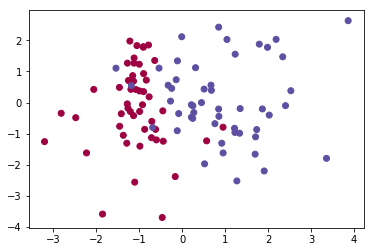

In [1]:
%pylab inline

np.random.seed(0)

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_features=2, n_redundant=0)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral')

We'll train a simple logistic regression on this data and visualize what it predicts

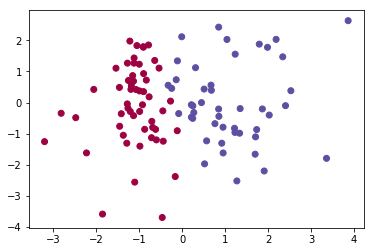

In [2]:
model = LogisticRegression()
model.fit(X, y)

preds = model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=preds, cmap=plt.cm.Spectral)

Notice that all of the blues that were in the red are now classified as blue, and vice-versa. Is there a clear line we can trace to understand how the model predicted?

**STOP**

Give [the write-up on contour plots](https://napsterinblue.github.io/notes/python/viz/contours/) another read as we'll be leveraging `np.meshgrid()` pretty extensively.

### Building our contour data

Like before, we need to be able to figure out the value of a function at every point in an (X, Y) space. Thus, we'll figure out the relevant boundaries

In [3]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1

And make a `meshgrid` representing all of the area spanned

In [4]:
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

xx.shape

(907, 907)

This step's tricky-- when our model predicts, it's expecting data to come in as a row of two values. So using `numpy` to unroll and then concatenate each of our X and Y steps, *we generate a prediction for each point in the X, Y space we care about*.

In [5]:
# Predict the function value for the whole grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Finally, using `contourf()`, we can plot this boundary neatly. Notice how the mis-classified colors pop right out!

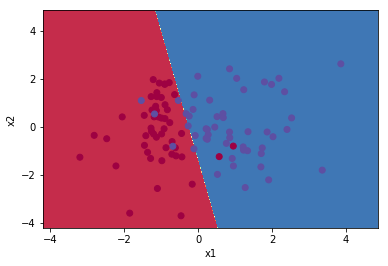

In [6]:
# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

## More complicated models

That worked great for a Linear classifier, but what modifications do we need to express weird, non-linear classifiers?

In [7]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**None**, it turns out!

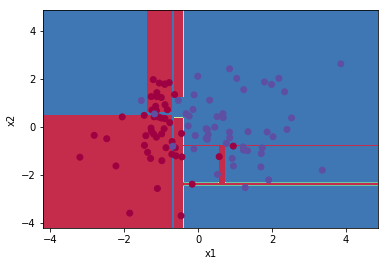

In [8]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid
Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

## As a function

In [9]:
def plot_decision_boundaries(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Neat

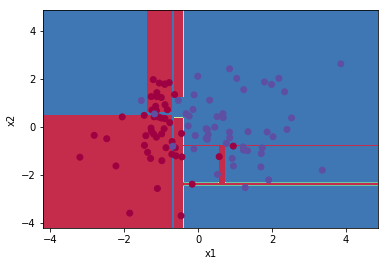

In [10]:
plot_decision_boundaries(dtc, X, y)